What data have you gathered, and how did you gather it? 

I’m using taxi data taken from Kaggle’s Taxi Prediction Competition (https://www.kaggle.com/c/pkdd-15-predict-taxi-service-trajectory-i). 

The data is in a csv file named "train.csv", which lists information about taxi rides in the city of Porto, Portugal.  


In [1]:
# load relevant libraries
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile

%matplotlib inline

# then load the csv file into a dataframe
df = pd.read_csv('~/code/kaggle/train.csv')





What steps have you taken to explore the data? 

In [3]:
# Let's look at the dataframe
print(df.head(5))

               TRIP_ID CALL_TYPE  ORIGIN_CALL  ORIGIN_STAND   TAXI_ID  \
0  1372636858620000589         C          NaN           NaN  20000589   
1  1372637303620000596         B          NaN             7  20000596   
2  1372636951620000320         C          NaN           NaN  20000320   
3  1372636854620000520         C          NaN           NaN  20000520   
4  1372637091620000337         C          NaN           NaN  20000337   

    TIMESTAMP DAY_TYPE MISSING_DATA  \
0  1372636858        A        False   
1  1372637303        A        False   
2  1372636951        A        False   
3  1372636854        A        False   
4  1372637091        A        False   

                                            POLYLINE  
0  [[-8.618643,41.141412],[-8.618499,41.141376],[...  
1  [[-8.639847,41.159826],[-8.640351,41.159871],[...  
2  [[-8.612964,41.140359],[-8.613378,41.14035],[-...  
3  [[-8.574678,41.151951],[-8.574705,41.151942],[...  
4  [[-8.645994,41.18049],[-8.645949,41.180517],[-..

In [3]:
#Let's get some summary statistics for the dataframe
df.describe()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,MISSING_DATA
count,1.710670e+06,364770.000000,806579.000000,1710670.000000,1.710670e+06,1710670
mean,1.388622e+18,24490.363018,30.272381,20000348.531181,1.388622e+09,5.845663e-06
std,9.180944e+15,19624.290043,17.747840,211.240983,9.180944e+06,0.002417774
min,1.372637e+18,2001.000000,1.000000,20000001.000000,1.372637e+09,False
25%,1.380731e+18,6593.000000,15.000000,20000166.000000,1.380731e+09,0
50%,1.388493e+18,18755.000000,27.000000,20000345.000000,1.388493e+09,0
75%,1.396750e+18,40808.000000,49.000000,20000520.000000,1.396750e+09,0
max,1.404173e+18,63884.000000,63.000000,20000981.000000,1.404173e+09,True


In [5]:
#What are the column headings?
list(df)

['TRIP_ID',
 'CALL_TYPE',
 'ORIGIN_CALL',
 'ORIGIN_STAND',
 'TAXI_ID',
 'TIMESTAMP',
 'DAY_TYPE',
 'MISSING_DATA',
 'POLYLINE']

In [6]:
# How many TAXI_ID's (taxis, roughly speaking) are there?
len(df['TAXI_ID'].unique())

448

In [7]:
# How many TRIP_ID's (trips, roughly speaking) are there?
print(len(df['TRIP_ID'].unique()))

# What's the average number of trips a taxi takes (number of trips over number of taxis)?
print(len(df['TRIP_ID'].unique()) / len(df['TAXI_ID'].unique()))

1710589
3818.2790178571427


In [8]:
# How many ORIGIN_STANDs (taxi stands where trips started) are there?
len(df['ORIGIN_STAND'].unique())

64

In [9]:
# How many unique TIMESTAMPS are there?
len(df['TIMESTAMP'].unique())

1655366

In [11]:
# How long is a trip?
len(eval(df['POLYLINE'][0]))

23

What insights have you gained from your exploration? 

To better segment the data in the hope of making predictions, I've looked at what times and days are the busiest.

In this paper (http://lbsn2012.cmuchimps.org/papers/Paper16_Mathew.pdf), which I'm using as a basis for my work, the authors cluster using day of the week and time.  What times are busiest?



In [16]:
# The TIMESTAMP is a Unix Timestamp-- convert it!
from datetime import datetime
unix_time = df['TIMESTAMP'][0]
timendate = datetime.fromtimestamp(unix_time).strftime('%c')
time_hour = datetime.fromtimestamp(unix_time).hour
day_of_week = datetime.fromtimestamp(unix_time).weekday()
print(timendate)

Sun Jun 30 17:00:58 2013


In [17]:
#Create a date and times column in the dataframe

df['datetimes'] = df['TIMESTAMP'].apply(datetime.fromtimestamp)

In [18]:
#Create an hours column in the dataframe

def hr_func(ts):
    return ts.hour

df['hours'] = df['datetimes'].apply(hr_func)

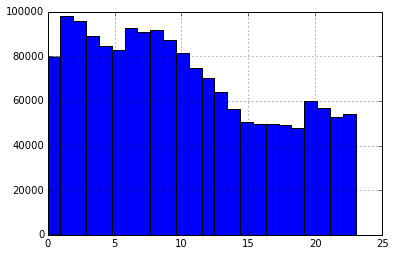

In [19]:
# What are the busiest hours?
# Let's look at a histogram
df['hours'].hist(bins=24);

In [20]:
# What are the busiest days of the week?
# Let's create a days of the week column in the dataframe
# Where Monday is 1 and Sunday is 7
df['daysofweek']= df['datetimes'].apply(lambda dt: dt.isoweekday())


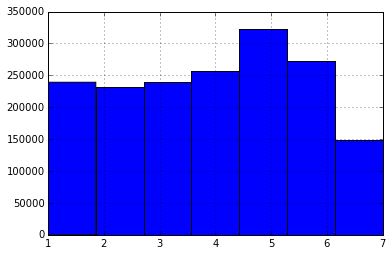

In [21]:
# Let's look at a histogram for the days of the week
# to see when's busiest
df['daysofweek'].hist(bins=7);

In [22]:
# So far, predictable -- Friday and Saturday are the busiest
# Monday and Thursday are busy, too.
# What are the busiest day and hour combinations?

df['datetimes'][0].strftime('%A %H')

'Sunday 17'

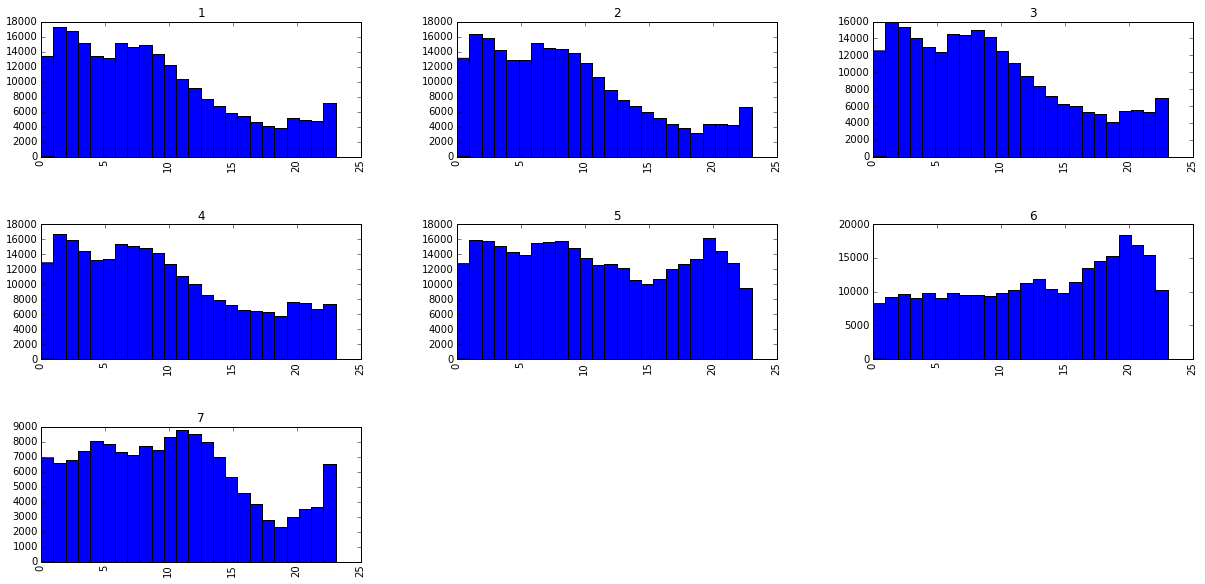

In [23]:
# Let's look at a histogram comparing days of the week
# against hours to see what times are busiest on which day
df['hours'].hist(by=df['daysofweek'],bins=24, figsize=(20,10));

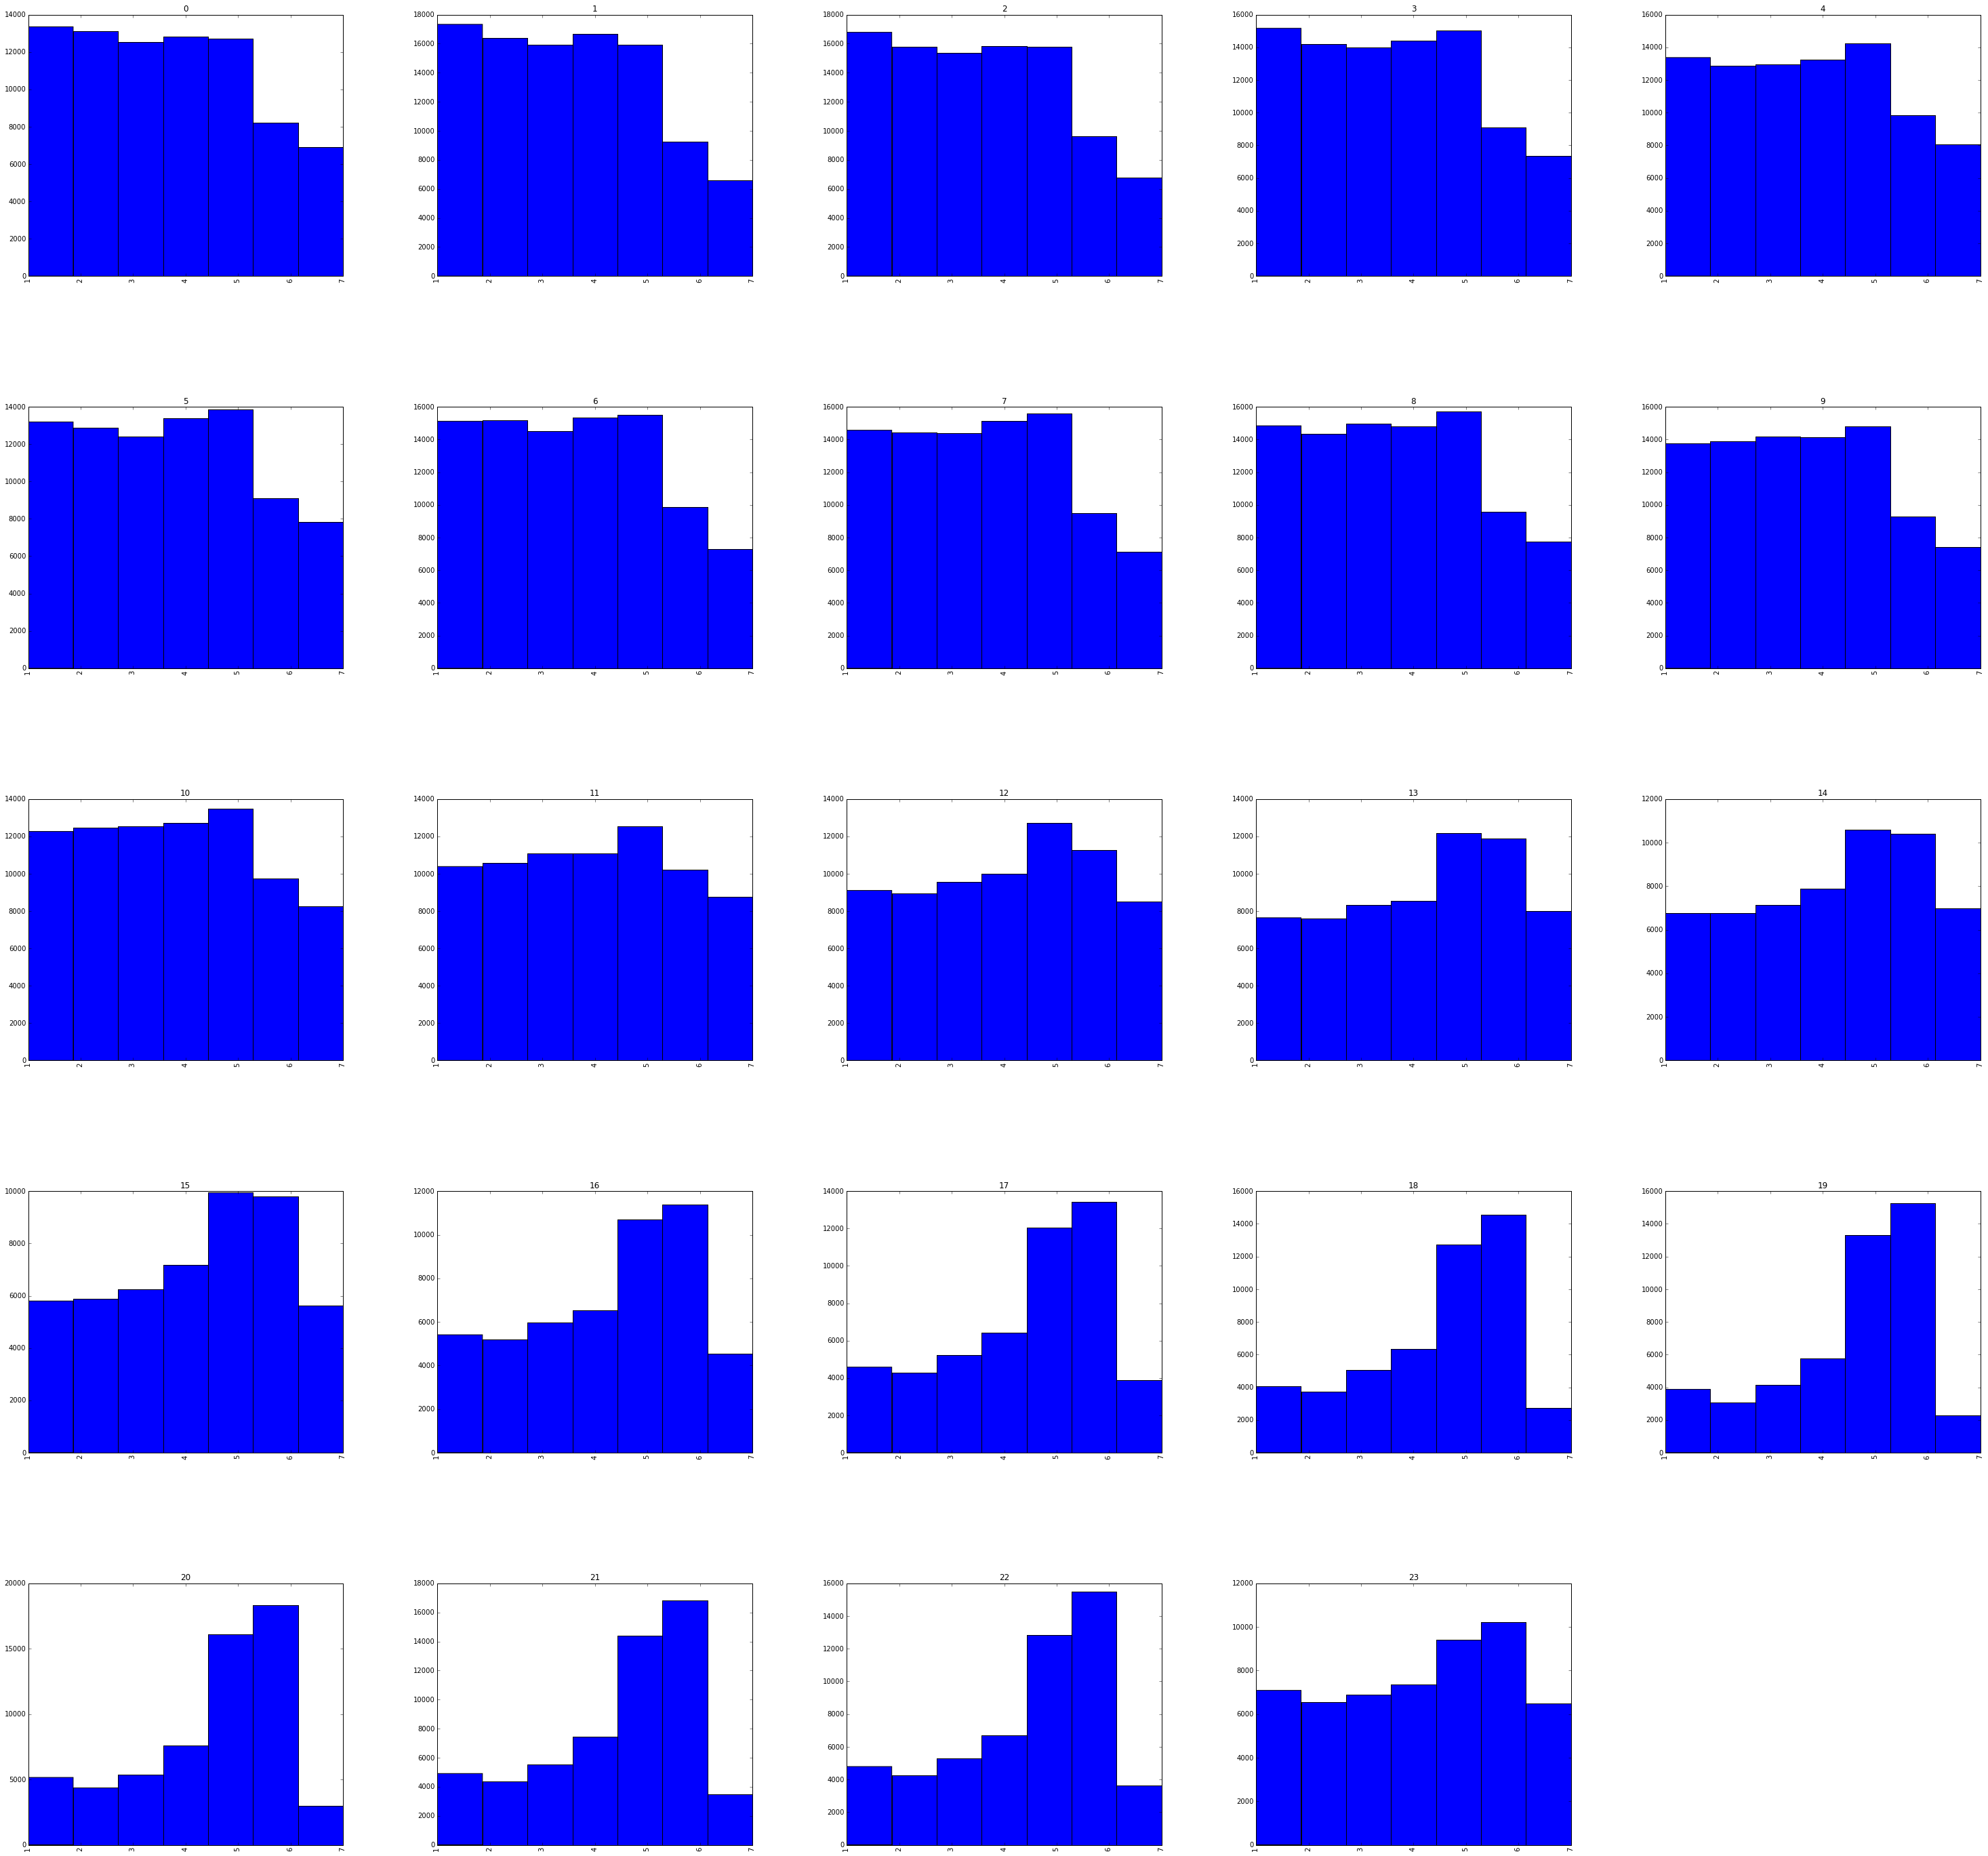

In [24]:
# Let's look at a histogram comparing hours against days of the week
# to see which day each hours is busiest

df['daysofweek'].hist(by=df['hours'], bins = 7, figsize=(50,50));

In [25]:
# It looks like 1am and 2am are busiest on weekdays!
# Let's create a day of the week and hour classifier column
df['daynhour']= df['datetimes'].apply(lambda dt: dt.strftime('%A %H'))

In [26]:
# What are the the busiest days and hours?
df['daynhour'].value_counts(20)

Saturday 20     0.010723
Monday 01       0.010129
Saturday 21     0.009845
Monday 02       0.009809
Thursday 01     0.009754
Tuesday 01      0.009590
Friday 20       0.009399
Wednesday 01    0.009301
Friday 01       0.009295
Thursday 02     0.009258
Tuesday 02      0.009227
Friday 02       0.009219
Friday 08       0.009182
Friday 07       0.009103
Friday 06       0.009069
Saturday 22     0.009050
Wednesday 02    0.008992
Thursday 06     0.008973
Saturday 19     0.008932
Monday 03       0.008862
Tuesday 06      0.008860
Thursday 07     0.008844
Monday 06       0.008836
Friday 03       0.008785
Wednesday 08    0.008738
Monday 08       0.008673
Friday 09       0.008663
Thursday 08     0.008649
Monday 07       0.008514
Saturday 18     0.008506
                  ...   
Monday 15       0.003390
Thursday 19     0.003367
Sunday 15       0.003293
Wednesday 21    0.003231
Monday 16       0.003162
Wednesday 20    0.003148
Wednesday 22    0.003081
Wednesday 17    0.003055
Tuesday 16      0.003030


The busiest time is Saturday at 8pm, but the second busiest is Monday at 1am!  
Followed by Saturday at 9pm, then Monday at 2am!  The busy hours you'd expect(Friday 8) are there, but so are weekdays at 1am or 2am.

In [17]:
# What are the dates covered by this dataset?
# The earliest date
min(df['datetimes'])

Timestamp('2013-06-30 17:00:53')

In [18]:
# The latest date in the dataset
max(df['datetimes'])

Timestamp('2014-06-30 16:59:56')

In [27]:
# Let's create a days of the year classifier column
df['daysofyear']= df['datetimes'].apply(lambda dt: dt.strftime('%Y-%m-%d'))

In [28]:
# What are the busiest days of the year?
df['daysofyear'].value_counts()

2014-06-23    8522
2013-12-31    8322
2014-06-06    8077
2013-12-20    8075
2014-05-09    7421
2014-05-03    7130
2013-09-27    7122
2013-11-01    7046
2014-06-07    7000
2013-11-26    6978
2013-10-04    6967
2013-10-11    6899
2014-02-14    6874
2014-02-28    6836
2013-12-06    6780
2013-07-05    6773
2014-05-30    6762
2013-09-20    6740
2014-04-24    6641
2013-12-13    6633
2014-05-31    6564
2014-06-20    6550
2014-02-21    6549
2013-12-21    6529
2014-05-23    6523
2013-09-14    6517
2013-10-25    6504
2014-03-28    6493
2014-05-06    6473
2014-04-30    6464
              ... 
2013-09-01    2824
2014-04-06    2815
2013-08-04    2804
2013-08-18    2798
2014-04-13    2789
2013-08-25    2761
2013-07-14    2761
2014-04-20    2701
2013-12-29    2692
2014-03-30    2689
2014-04-27    2686
2013-12-01    2681
2014-06-10    2658
2013-12-15    2626
2014-02-09    2615
2014-03-23    2549
2013-11-10    2537
2013-12-25    2513
2014-02-23    2509
2014-01-05    2504
2014-02-02    2461
2014-03-16  

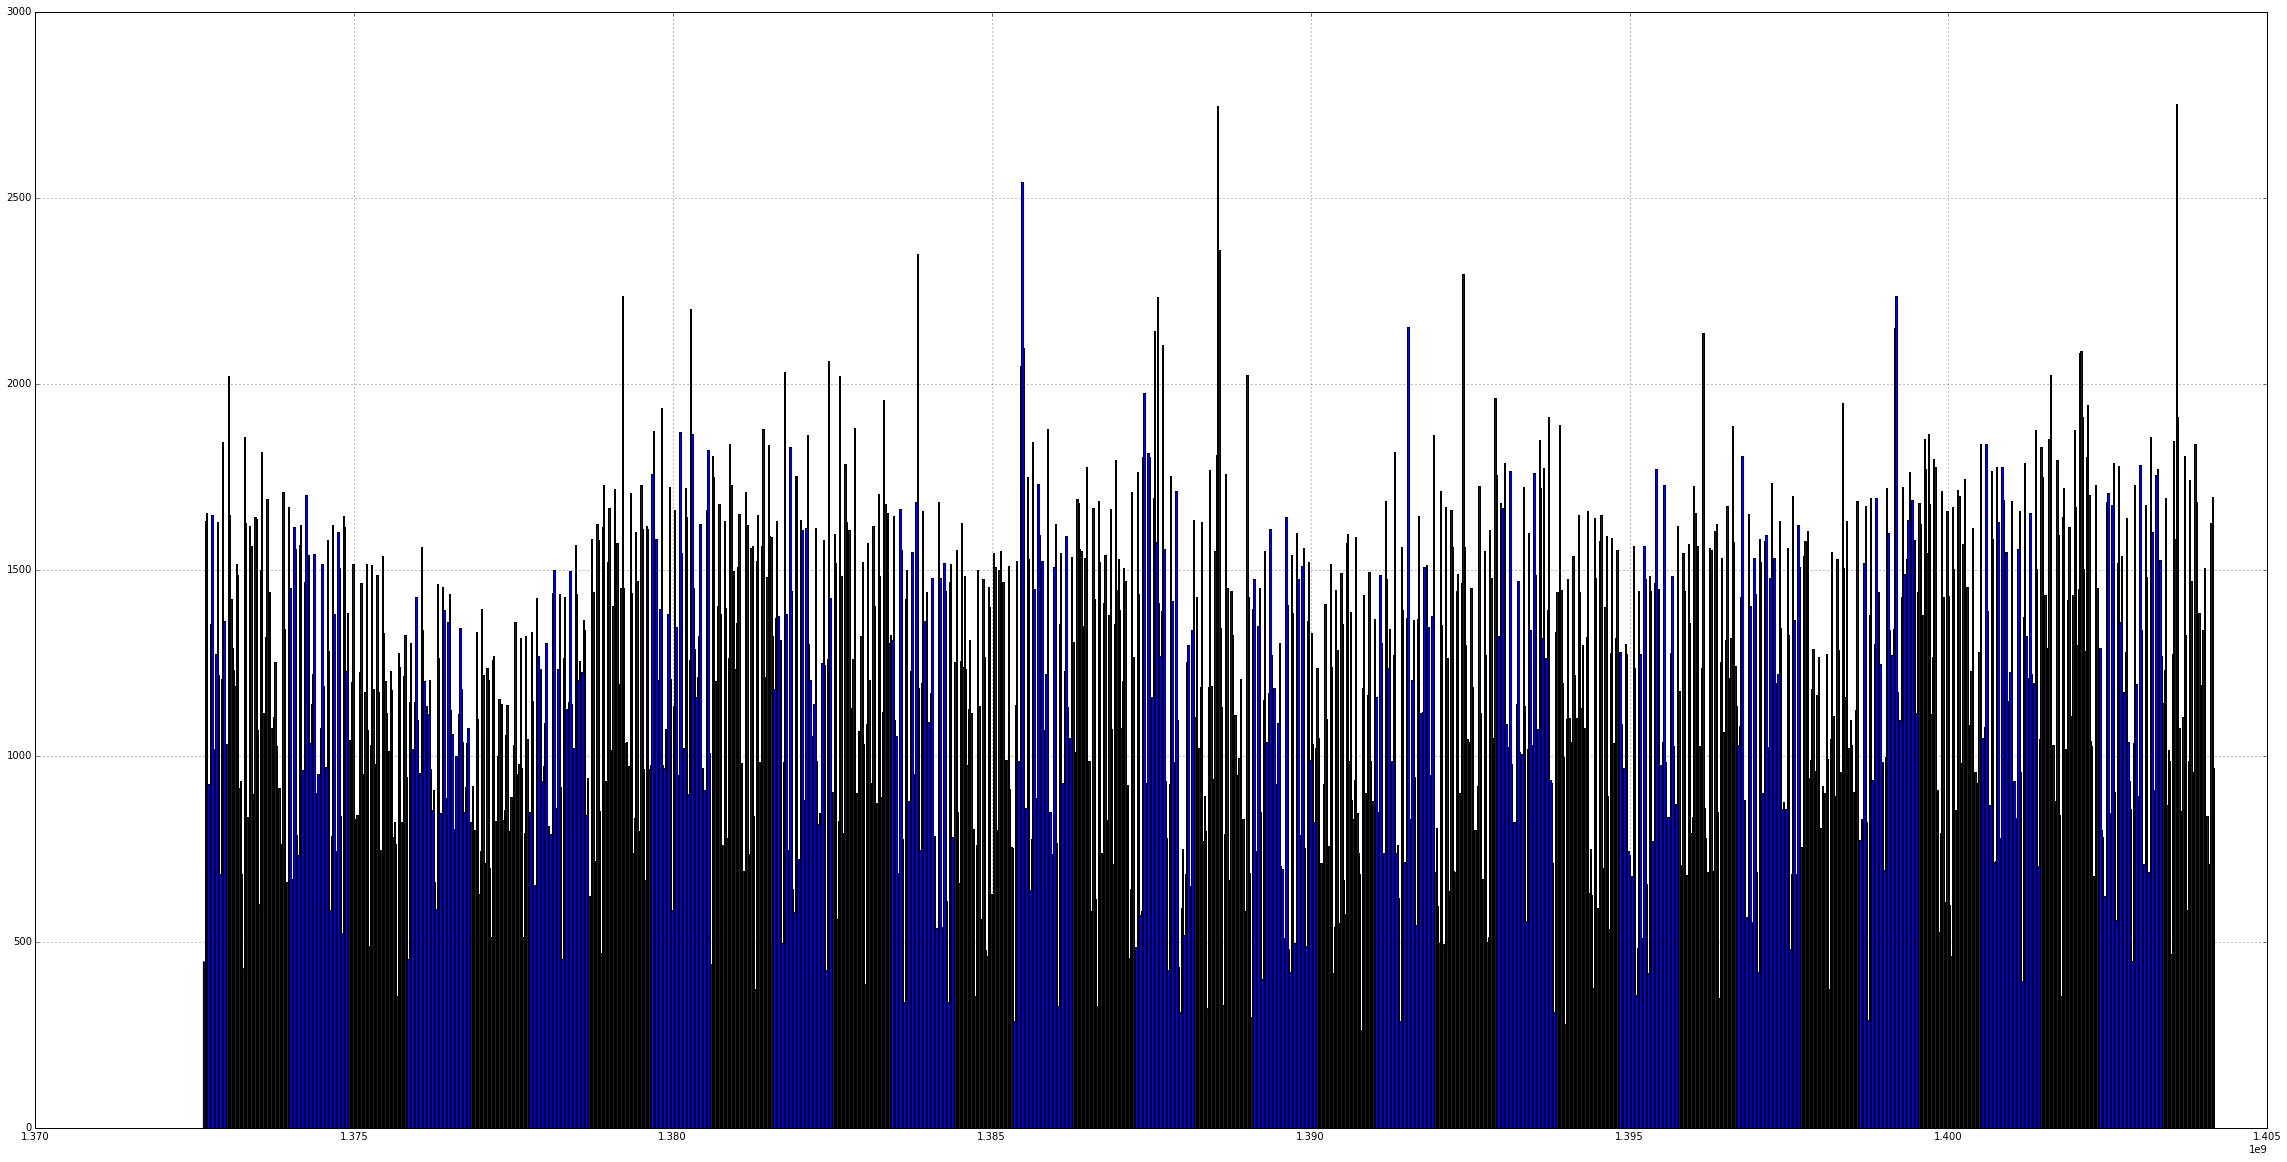

In [29]:
# Let's plot the busiest days of the year
from matplotlib.dates import DateFormatter, DayLocator, MonthLocator

df['TIMESTAMP'].hist(bins=1500, figsize = (40, 20));



In [23]:
# From the Kaggle's competition description, the DAY_TYPE column should indicate:
#  "‘B’ if this trip started on a holiday or any other special day (i.e. extending holidays, floating holidays, etc.);
#  ‘C’ if the trip started on a day before a type-B day;
#  ‘A’ otherwise (i.e. a normal day, workday or weekend)."

#  Some of those busy days should show up in that column, right?
df['DAY_TYPE'].describe()

count     1710670
unique          1
top             A
freq      1710670
Name: DAY_TYPE, dtype: object

It's missing B or C values!  Looks like I'll have to update that column myself, perhaps using the busiest days from the histogram and 'daysofyear' column listed above.

In [24]:
# Which are the busiest taxis?
df['TAXI_ID'].value_counts().head(20)

20000080    10746
20000403     9238
20000066     8449
20000364     7821
20000483     7729
20000129     7609
20000307     7498
20000621     7276
20000089     7267
20000424     7176
20000492     7171
20000529     6937
20000616     6924
20000678     6538
20000372     6535
20000304     6505
20000042     6467
20000325     6460
20000179     6430
20000235     6410
dtype: int64

It does look like there are busier taxis than others.  But the most interesting metric appears to be time and day.
In several papers on taxi trajectory prediction, segmenting times is important in training the model.  Let's try splitting the taxi times into groups based on time.

In [25]:
# How big is the group of rides between 8pm and 6am?
criterion = df[(df['hours'] < 7)|(df['hours'] >19)]

In [26]:
criterion.shape

(846751, 14)

In [27]:
# How big is the group of rides between 6am and 8pm?
criterion2= df[(df['hours']<=19) & (df['hours']>=7)]

In [28]:
criterion2.shape

(863919, 14)

In [29]:
# The two groups together should add up to the whole set
len(criterion)+len(criterion2)

1710670

It looks like the number of nighttime and daytime trips are actually split pretty evenly.  Some further clustering might be necessary to help train the model.

In [30]:
# Let's look at some of the other values
# Like how many different taxi ORIGIN_STANDs 
# are there in the dataset?
len(df['ORIGIN_STAND'].unique())

64

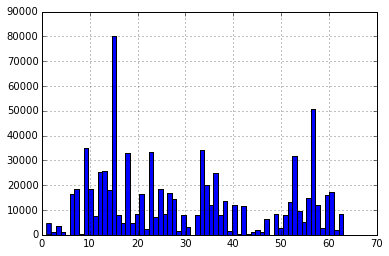

In [31]:
# Which taxi ORIGIN_STANDs are the most popular?
# Let's see a histogram
df['ORIGIN_STAND'].hist(bins=64);

In [32]:
# Let's see a list of which taxi ORIGIN_STANDs are the most popular
df['ORIGIN_STAND'].value_counts().head(10)

15    80241
57    50882
9     34818
33    34128
23    33344
18    32937
53    31712
13    25685
12    25434
36    24754
dtype: int64

In [33]:
# Hmm.  How many items in that ORIGIN_STAND column are empty, though?
df['ORIGIN_STAND'].isnull().values.sum()/len(df)

0.52850111359876539

In [34]:
# Half!  Why is that?  
# Wait, how many different CALL_TYPES are there in the dataset?
len(df['CALL_TYPE'].unique())

3

In [35]:
# Which CALL_TYPES are the most popular?
df['CALL_TYPE'].value_counts()

# According to the Kaggle site, CALL_TYPE "...may contain one of three possible values:
#  ‘A’ if this trip was dispatched from the central;
#  ‘B’ if this trip was demanded directly to a taxi driver on a specific stand;
#  ‘C’ otherwise (i.e. a trip demanded on a random street)."


B    817881
C    528019
A    364770
dtype: int64

In [36]:
# Looks like taxi ORIGIN_STANDS are the most popular!
# 2 times as popular, in fact.  It and random street pickups
# make up nearly 79% of the values.
# The half figure makes sense, too-- half of the trips
# don't originate at taxi stands.
# Any null values in the CALL_TYPES column?
df['CALL_TYPE'].isnull().values.sum()

0

OK, probably pretty complete.  Overall, it appears clustering based on time and geospatial area will be important.

In [4]:
# Let's look at some of the geospatial data!
# Create a column of the trip start points
df['START_POINT'] = df['POLYLINE'].apply(lambda col: eval(col)[0] if len(eval(col))>0 else [])


In [5]:
#Create a column of the trip end points
df['END_POINT'] = df['POLYLINE'].apply(lambda col: eval(col)[-1] if len(eval(col))>0 else [])

41.140683 41.18274
-8.679609 -8.574075


(-0.5, 510.5, 510.5, -0.5)

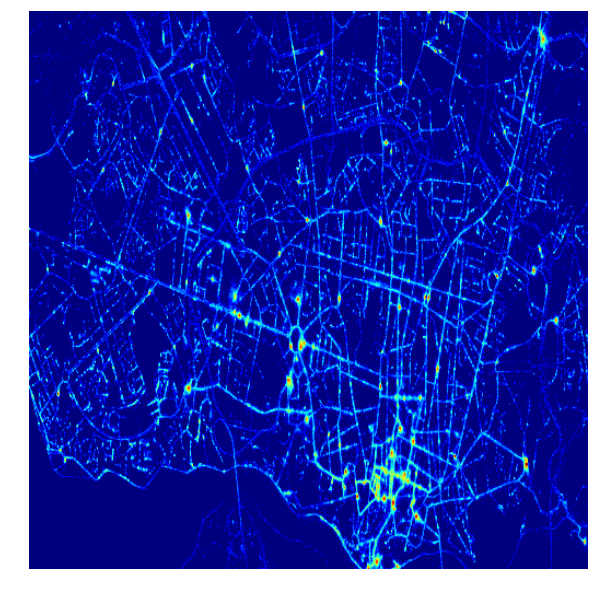

In [6]:
# Let's try plotting the start points to see which ones are busier

start_latlong = np.array([[p[1], p[0]] for p in df['START_POINT'] if len(p)>0])

#use the low and high latitude and longitude for bins
start_lat_low, start_lat_hgh = np.percentile(start_latlong[:,0], [2, 98])
start_lon_low, start_lon_hgh = np.percentile(start_latlong[:,1], [2, 98])
print(start_lat_low, start_lat_hgh)
print(start_lon_low, start_lon_hgh)

bins = 512
start_lat_bins = np.linspace(start_lat_low, start_lat_hgh, bins)
start_lon_bins = np.linspace(start_lon_low, start_lon_hgh, bins)

H2, _, _ = np.histogram2d(start_latlong[:,0], start_latlong[:,1], bins=(start_lat_bins, start_lon_bins))
img = np.log(H2[::-1, :] + 1)
plt.figure(figsize= (10, 10))
ax = plt.subplot(1,1,1)
plt.imshow(img)
plt.axis('off')

41.123232 41.237424
-8.687466 -8.553186


(-0.5, 510.5, 510.5, -0.5)

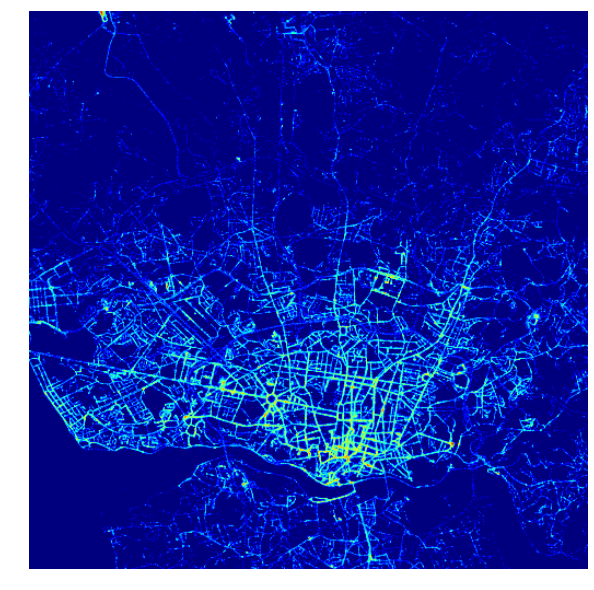

In [7]:
# Let's try plotting the end points to see which ones are busier

end_latlong = np.array([[p[1], p[0]] for p in df['END_POINT'] if len(p)>0])
# cut off long distance trips
end_lat_low, end_lat_hgh = np.percentile(end_latlong[:,0], [2, 98])
end_lon_low, end_lon_hgh = np.percentile(end_latlong[:,1], [2, 98])


print(end_lat_low, end_lat_hgh)
print(end_lon_low, end_lon_hgh)

bins = 512
end_lat_bins = np.linspace(end_lat_low, end_lat_hgh, bins)
end_lon_bins = np.linspace(end_lon_low, end_lon_hgh, bins)

H3, _, _ = np.histogram2d(end_latlong[:,0], end_latlong[:,1], bins=(end_lat_bins, end_lon_bins))
img = np.log(H3[::-1, :] + 1)
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
plt.imshow(img)
plt.axis('off')

It definitely looks like some areas are busier than others.  This pattern turned out to be useful for clustering and prediction.

To deal with the size of the dataframe, I decided to randomly sample a piece of it and work with that.

In [30]:
# Rather than use all 1.7 million rows, let's take a 9000 row (~.5%) sample of the data 
rows = np.random.choice(df.index.values, 9000)
sampled_df = df.ix[rows]



In [31]:
print(sampled_df.head(5))

                     TRIP_ID CALL_TYPE  ORIGIN_CALL  ORIGIN_STAND   TAXI_ID  \
844019   1388267053620000364         C          NaN           NaN  20000364   
1538002  1401279907620000546         B          NaN            32  20000546   
617362   1384035394620000665         A        17739           NaN  20000665   
949042   1390387265620000499         B          NaN            49  20000499   
1230848  1395766500620000393         B          NaN            15  20000393   

          TIMESTAMP DAY_TYPE MISSING_DATA  \
844019   1388267053        A        False   
1538002  1401279907        A        False   
617362   1384035394        A        False   
949042   1390387265        A        False   
1230848  1395766500        A        False   

                                                  POLYLINE  \
844019   [[-8.613441,41.141259],[-8.61345,41.141241],[-...   
1538002  [[-8.62767,41.157648],[-8.62767,41.15763],[-8....   
617362   [[-8.618373,41.169591],[-8.618373,41.169591],[...   
949042

In [33]:
#Just to be sure, let's recreate the start points in the new, smaller sampled dataframe
sampled_df['START_POINT'] = sampled_df['POLYLINE'].apply(lambda col: eval(col)[0] if len(eval(col))>0 else [])

/Users/mikeludwig/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [34]:
#And also recreate the end points 
sampled_df['END_POINT'] = sampled_df['POLYLINE'].apply(lambda col: eval(col)[-1] if len(eval(col))>0 else [])

/Users/mikeludwig/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [35]:
#Now let's create an array of the starting points
start_latlong = np.array([[p[1], p[0]] for p in sampled_df['START_POINT'] if len(p)>0])

# And an array of the end points

end_latlong = np.array([[p[1], p[0]] for p in sampled_df['END_POINT'] if len(p)>0])


In [36]:
#Let's create a new length field for the trip length, which could be a helpful metric 
sampled_df['LEN'] = sampled_df['POLYLINE'].apply(lambda x: len(x))

/Users/mikeludwig/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


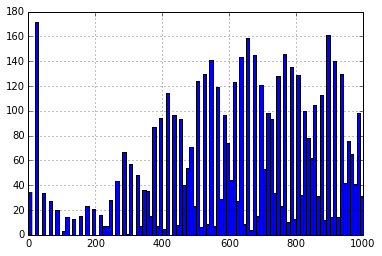

In [37]:
#Let's see a histogram of trip length
sampled_df['LEN'].hist(bins = 100, range=[0, 1000]);

In [38]:
#Let's see the new dataframe
print(sampled_df)

                     TRIP_ID CALL_TYPE  ORIGIN_CALL  ORIGIN_STAND   TAXI_ID  \
844019   1388267053620000364         C          NaN           NaN  20000364   
1538002  1401279907620000546         B          NaN            32  20000546   
617362   1384035394620000665         A        17739           NaN  20000665   
949042   1390387265620000499         B          NaN            49  20000499   
1230848  1395766500620000393         B          NaN            15  20000393   
1027278  1391928147620000698         C          NaN           NaN  20000698   
1398148  1398946821620000361         C          NaN           NaN  20000361   
938809   1390131660620000625         A        15043           NaN  20000625   
577971   1383346956620000254         A         2002           NaN  20000254   
1177776  1394728930620000616         C          NaN           NaN  20000616   
1471302  1400084601620000440         B          NaN            25  20000440   
773789   1386993847620000015         C          NaN 

I attempted to use DBSCAN clustering first, since a number of online sources (http://psrcentre.org/images/extraimages/16%20214368.pdf) (http://people.csail.mit.edu/dannyf/traj.pdf) listed it as good at clustering trajectories.  It also didn’t require an input amount for the number of clusters, it filtered out noise, and it could find smaller clusters.(https://en.wikipedia.org/wiki/DBSCAN)


Estimated number of clusters: 6
{0, 1, 2, 3, 4, 5, -1}
8966


(array([  4.80000000e+01,   8.88900000e+03,   4.00000000e+00,
          3.00000000e+00,   1.40000000e+01,   8.00000000e+00]),
 array([-1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <a list of 6 Patch objects>)

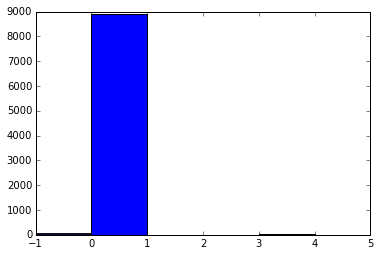

In [40]:
#Let's try DBSCAN with a minimum sample of 3
from sklearn.cluster import DBSCAN
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X = start_latlong
y = end_latlong

# Compute DBSCAN
y = StandardScaler().fit_transform(y)
db_clus = DBSCAN(min_samples=3, algorithm='kd_tree').fit(y)
labels = db_clus.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3)

print(set(labels))

#plt.figure(figsize=(20,10))
#plt.plot(labels)

print(len(labels))

plt.hist(labels, bins =6)

It looks like everything is clustered around either 0 or 1.

Estimated number of clusters: 11
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}
8966


(array([  3.80000000e+01,   8.88900000e+03,   1.40000000e+01,
          4.00000000e+00,   0.00000000e+00,   4.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   2.00000000e+00]),
 array([ -1.        ,  -0.21428571,   0.57142857,   1.35714286,
          2.14285714,   2.92857143,   3.71428571,   4.5       ,
          5.28571429,   6.07142857,   6.85714286,   7.64285714,
          8.42857143,   9.21428571,  10.        ]),
 <a list of 14 Patch objects>)

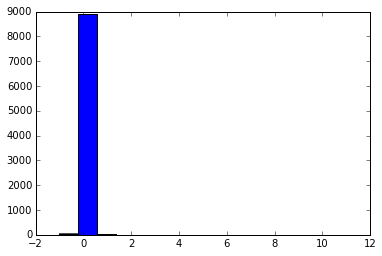

In [43]:
#Let's try DBSCAN (with a minimum sample of 2) to cluster the endpoints

y = StandardScaler().fit_transform(y)
db_clus = DBSCAN(min_samples=2, algorithm='kd_tree').fit(y)
labels = db_clus.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
core_samples = db_clus.core_sample_indices_
print('Estimated number of clusters: %d' % n_clusters_)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3)

print(set(labels))

#plt.figure(figsize=(20,10))
#plt.plot(labels)

print(len(labels))

plt.hist(labels, bins =14)


Again, it's clustered too closely to be meaningful for prediction.  Everything is clustered around either 0 or 1.

In [44]:
#Let's try creating a grid of 500 squares and see if that can be used for prediction
import math

regions = np.array([[p[1], p[0]] for p in sampled_df['END_POINT'] if len(p)>0])
start_lat_hgh= max(regions[:, 1])
start_lon_hgh= max(regions[:, 0])

segment = 500
print(np.floor(regions[:,1]/start_lat_hgh*segment))
print(np.floor(regions[:,0]/start_lon_hgh*segment))
print(regions)



[ 585.  585.  590. ...,  586.  584.  587.]
[ 491.  491.  491. ...,  491.  491.  491.]
[[ 41.141025  -8.613333]
 [ 41.146776  -8.6202  ]
 [ 41.156685  -8.681463]
 ..., 
 [ 41.152824  -8.627544]
 [ 41.156181  -8.602425]
 [ 41.161203  -8.640621]]


Unfortunately, I didn't have enough time to create a gridding function to convert the GPS data to a grid number.  However, using the GPS coordinates as y with K Nearest Neighbors algorithm showed the problem of GPS-- it couldn't be used as a reliable training output, since the algorithm only outputs a single value.  The "ValueError: continuous-multioutput is not supported" pointed me towards using clustering in the first place.

In [47]:
y = regions
X = start_latlong


from sklearn import metrics
from sklearn import cross_validation
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


print(y)


knn = KNeighborsClassifier(n_neighbors=35, metric='euclidean')
knn.fit(X_train, y_train) 
predicted = knn.predict(X_test)

print(predicted[:10], y_train[:10], y_test[:10])
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted)

print(cm)


print(mean_squared_error(y_test, predicted))
print(accuracy_score(y_test, predicted))


[[ 41.141025  -8.613333]
 [ 41.146776  -8.6202  ]
 [ 41.156685  -8.681463]
 ..., 
 [ 41.152824  -8.627544]
 [ 41.156181  -8.602425]
 [ 41.161203  -8.640621]]
[[ 41.125905  -8.687574]
 [ 41.144382  -8.692983]
 [ 41.122026  -8.620011]
 [ 41.163435  -8.688483]
 [ 41.120487  -8.69067 ]
 [ 41.071653  -8.68914 ]
 [ 41.142258  -8.6139  ]
 [ 41.12964   -8.707779]
 [ 41.113035  -8.672454]
 [ 41.139198  -8.712882]] [[ 41.162562  -8.611209]
 [ 41.15682   -8.654814]
 [ 41.146551  -8.61354 ]
 [ 41.175855  -8.659998]
 [ 41.156343  -8.629596]
 [ 41.153364  -8.654706]
 [ 41.177241  -8.587611]
 [ 41.186673  -8.58078 ]
 [ 41.147244  -8.617941]
 [ 41.174829  -8.58294 ]] [[ 41.23746   -8.670267]
 [ 41.161563  -8.640513]
 [ 41.145462  -8.61084 ]
 [ 41.165325  -8.650296]
 [ 41.237154  -8.670105]
 [ 41.145777  -8.596233]
 [ 41.155101  -8.630091]
 [ 41.143167  -8.610714]
 [ 41.148882  -8.585685]
 [ 41.142807  -8.617293]]


ValueError: continuous-multioutput is not supported

In [26]:
#Let's try clustering the endpoints using K Means Clustering instead

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import cross_validation
from time import time

X = start_latlong
y = end_latlong

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#X = StandardScaler().fit_transform(X_train)
k_means_5 = KMeans(init='random', n_clusters=6, n_init=25)
k_means_5.fit(X)
k_means_5_labels = k_means_5.predict(y)
k_means_5_cluster_centres = k_means_5.cluster_centers_

print(k_means_5_labels)
print(set(k_means_5_labels))

#from sklearn import metrics
#k_means_5_silhouette_score = metrics.silhouette_score(X, k_means_5_labels, metric='euclidean')
#print(k_means_5_silhouette_score)

[2 1 5 ..., 5 5 0]
{0, 1, 2, 3, 4, 5}


In [34]:
colors = list("bgrcmyk")
colrs_enum = list(enumerate(colors))
print(colrs_enum)

[(0, 'b'), (1, 'g'), (2, 'r'), (3, 'c'), (4, 'm'), (5, 'y'), (6, 'k')]


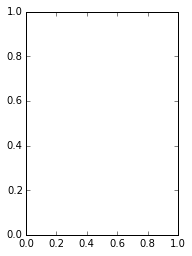

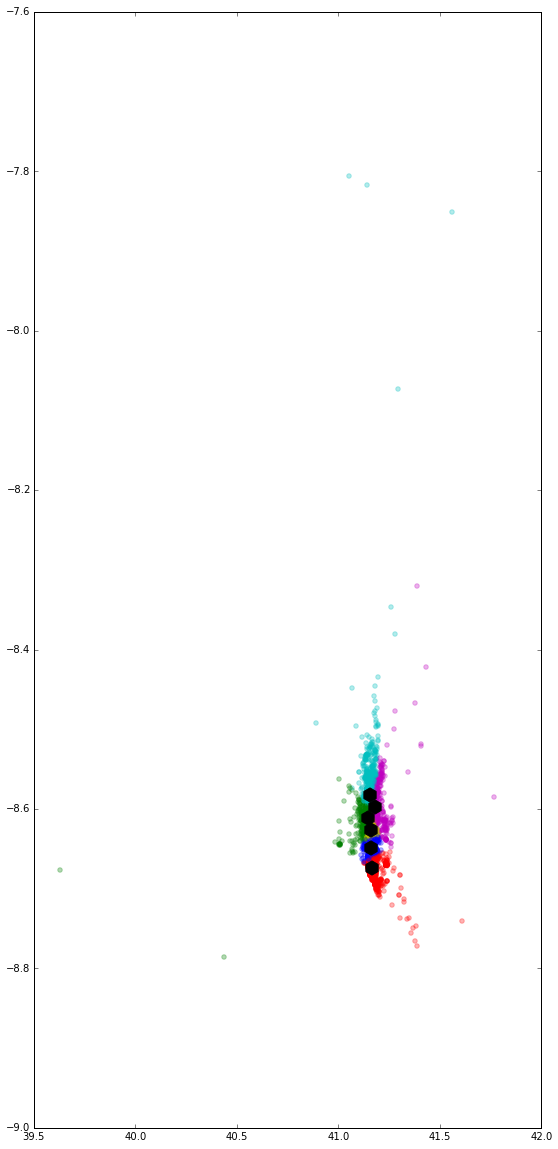

In [28]:
# Let's map the endpoints, giving different colors to each cluster
# and also show each cluster center point

y = end_latlong
X= start_latlong

ax2 = plt.subplot(122)
plt.figure(figsize=(20,20))
#ax2.set_xlim([40,42])
#ax2.set_ylim([-9, -7])
#ax2.scatter((X[:,0]), (X[:,1]), color='blue', alpha = 0.3)

colors = list("bgrcmyk")
#colrs_enum = list(enumerate(colors))
#for  in clusters:
#  marker, color = markers[i % len(markers)], colors[i % len(colors)]
#  plt.plot(cluster[:,0],cluster[:,1],marker+color)
#  i += 1

ax1=plt.subplot(122)
plt.figure(figsize=(20,20))
for idx, (lat, lon) in enumerate(y):
    c_label= k_means_5_labels[idx] 
    if c_label <len(colors):
        ax1.scatter(lat, lon ,color = colors[c_label], alpha = 0.3)

ax1.scatter(k_means_5_cluster_centres[:, 0], k_means_5_cluster_centres[:, 1], color ='k', marker='h', s=200)
#ax1.set_ylim([-8, -9])
#ax1.set_xlim([41, 41.5])

#k_means_5_labels    
#ax1.set_xlim([40,42])
#ax1.set_ylim([-9, -7])
#ax1.scatter((y[:,0]), (y[:,1]), color='red', alpha = 0.3)


(array([ 1244.,  2798.,  1181.,  1192.,  1121.,  1432.]),
 array([ 0.        ,  0.83333333,  1.66666667,  2.5       ,  3.33333333,
         4.16666667,  5.        ]),
 <a list of 6 Patch objects>)

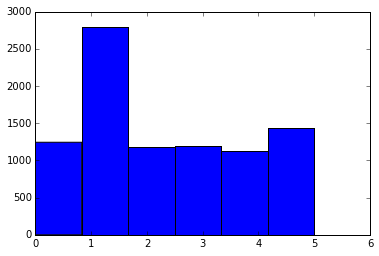

In [29]:
#What's the most common label?
plt.hist(k_means_5_labels, bins= 6)

It was still clustered pretty heavily in region 1, but other regions were represented more fairly.

In [228]:
sampled_df[]
#colors = list("bgrcmyk")
#print(colors)
#enumerate(colors)

['b', 'g', 'r', 'c', 'm', 'y', 'k']


In [133]:
print(X_train[:3], y[:3])

[[ 0.82070888  0.06088219]
 [-0.27929212  0.00180301]
 [-0.36208475 -0.03007338]] [[ 41.14953   -8.604297]
 [ 41.180769  -8.582436]
 [ 41.150664  -8.600544]]


On the intuition that riders leaving from the same place might also end up in the same place, I tried the K Nearest Neighbors algorithm to make predictions from the GPS data.

Only the starting and ending GPS coordinates, along with the k means cluster label for the relevant endpoint were entered into the knn algorithm.


In [49]:
# Let's try the KNearest Neighbors Classifier to predict a destination
#Let's try clustering the endpoints using K Means Clustering instead
from sklearn.cluster import KMeans
from sklearn import cross_validation
from time import time

X = start_latlong
y = end_latlong

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#X = StandardScaler().fit_transform(X_train)
k_means_5 = KMeans(init='random', n_clusters=6, n_init=25)
k_means_5.fit(X)
k_means_5_labels = k_means_5.predict(y)
k_means_5_cluster_centres = k_means_5.cluster_centers_

print(k_means_5_labels)
print(set(k_means_5_labels))

#from sklearn import metrics
#k_means_5_silhouette_score = metrics.silhouette_score(X, k_means_5_labels, metric='euclidean')
#print(k_means_5_silhouette_score)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
y_train_classes = k_means_5.predict(y_train)
y_test_classes = k_means_5.predict(y_test)

knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train_classes) 
predicted = knn.predict(X_test)

print(predicted[:10], y_train[:10], y_test[:10])

[2 2 1 ..., 0 2 0]
{0, 1, 2, 3, 4, 5}
[0 2 4 2 5 1 5 0 0 2] [[ 41.158323  -8.680446]
 [ 41.191587  -8.632746]
 [ 41.178465  -8.648937]
 [ 41.176791  -8.62542 ]
 [ 41.166279  -8.686278]
 [ 41.148351  -8.611173]
 [ 41.141025  -8.614881]
 [ 41.143347  -8.637093]
 [ 41.237694  -8.670168]
 [ 41.163273  -8.583867]] [[ 41.163084  -8.630271]
 [ 41.162463  -8.609076]
 [ 41.148702  -8.58834 ]
 [ 41.237298  -8.670141]
 [ 41.17518   -8.624781]
 [ 41.236866  -8.670132]
 [ 41.15097   -8.649387]
 [ 41.163777  -8.664759]
 [ 41.232231  -8.591571]
 [ 41.140557  -8.615817]]


In [50]:
#Let's check the accuracy of the classifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_classes, predicted)

print(cm)


print(mean_squared_error(y_test_classes, predicted))
print(accuracy_score(y_test_classes, predicted))


[[201  78 219   0  43  28]
 [159  94 184   0  38  26]
 [241 120 425   0  54  54]
 [  0   0   1   2   0   0]
 [115  52 142   0  56  32]
 [ 85  32 123   0  33  53]]
4.42936802974
0.308921933086


This model turns out to work pretty well, considering that it's using only start and end points, and that it's predicting the correct cluster out of 6.  It consistently predicts correctly 30% of the time.

To improve the accuracy score, I smartened the algorithm by using subsets of data, selecting it for various factors that seemed promising from the earlier data exploration.

In [51]:
from datetime import datetime
sampled_df['datetimes'] = sampled_df['TIMESTAMP'].apply(datetime.fromtimestamp)

def hr_func(ts):
    return ts.hour

sampled_df['hours'] = sampled_df['datetimes'].apply(hr_func)

/Users/mikeludwig/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/mikeludwig/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


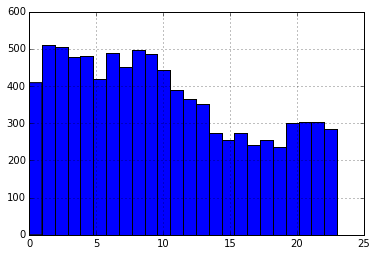

In [52]:
# Let's look at a histogram of the busy hours in the smaller sampled dataframe
sampled_df['hours'].hist(bins=24)

In [53]:
# How big is the group of rides between 8pm and 6am?
criterion = sampled_df[(sampled_df['hours'] < 7)|(sampled_df['hours'] >19)]
print(criterion.shape)

# How big is the group of rides between 6am and 8pm?
criterion2= sampled_df[(sampled_df['hours']<=19) & (sampled_df['hours']>=7)]
print(criterion2.shape)

(4483, 17)
(4517, 17)


In [54]:
#Let's try using those data subsets for the model

cri_start_latlong = np.array([[p[1], p[0]] for p in criterion['START_POINT'] if len(p)>0])
#tim_start_lat_low, start_lat_hgh = np.percentile(start_latlong[:,0], [2, 98])
#tim_start_lon_low, tim_start_lon_hgh = np.percentile(start_latlong[:,1], [2, 98])
cri_end_latlong = np.array([[p[1], p[0]] for p in criterion['END_POINT'] if len(p)>0])
# cut off long distance trips
#end_lat_low, end_lat_hgh = np.percentile(end_latlong[:,0], [2, 98])
#end_lon_low, end_lon_hgh = np.percentile(end_latlong[:,1], [2, 98])


In [55]:
cri2_start_latlong = np.array([[p[1], p[0]] for p in criterion2['START_POINT'] if len(p)>0])
cri2_end_latlong = np.array([[p[1], p[0]] for p in criterion2['END_POINT'] if len(p)>0])


In [58]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import cross_validation
from time import time

X_2 = cri2_start_latlong
y_2 = cri2_end_latlong

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3)

#X = StandardScaler().fit_transform(X_train)
k_means_5 = KMeans(init='random', n_clusters=12, n_init=25)
k_means_5.fit(X_2)
k_means_5_labels = k_means_5.predict(y_2)
k_means_5_cluster_centres = k_means_5.cluster_centers_

print(k_means_5_labels)
print(set(k_means_5_labels))

#from sklearn import metrics
#k_means_5_silhouette_score = metrics.silhouette_score(X, k_means_5_labels, metric='euclidean')
#print(k_means_5_silhouette_score)

[11  3  4 ..., 11  9 11]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
y_train_classes = k_means_5.predict(y_train)
y_test_classes = k_means_5.predict(y_test)

knn = KNeighborsClassifier(n_neighbors=100, metric='euclidean')
knn.fit(X_train, y_train_classes) 
predicted = knn.predict(X_test)

print(predicted[:10], y_train[:10], y_test[:10])

[ 9  3 11  8  7  9  9  9  9  9] [[ 41.145255  -8.615961]
 [ 41.154894  -8.648928]
 [ 41.162283  -8.607951]
 [ 41.166612  -8.649648]
 [ 41.153274  -8.639397]
 [ 41.150079  -8.660286]
 [ 41.175189  -8.586207]
 [ 41.142897  -8.630424]
 [ 41.184045  -8.603694]
 [ 41.153427  -8.562033]] [[ 41.147559  -8.621658]
 [ 41.142384  -8.643348]
 [ 41.185656  -8.653896]
 [ 41.146137  -8.617689]
 [ 41.161266  -8.600058]
 [ 41.183244  -8.582499]
 [ 41.149872  -8.589564]
 [ 41.156802  -8.67933 ]
 [ 41.171796  -8.634042]
 [ 41.139333  -8.558154]]


In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_classes, predicted)

print(cm)


print(mean_squared_error(y_test_classes, predicted))
print(accuracy_score(y_test_classes, predicted))


[[201  78 219   0  43  28]
 [159  94 184   0  38  26]
 [241 120 425   0  54  54]
 [  0   0   1   2   0   0]
 [115  52 142   0  56  32]
 [ 85  32 123   0  33  53]]
4.42936802974
0.308921933086


Sampling for time didn't seem to affect the accuracy score

In [60]:
sampled_df['daysofweek']= sampled_df['datetimes'].apply(lambda dt: dt.isoweekday())

# How big is the group of rides between 8pm and 6am?
criterion = sampled_df[(sampled_df['hours'] < 7)|(sampled_df['hours'] >19)]
print(criterion.shape)

# How big is the group of rides between 6am and 8pm?
criterion2= sampled_df[(sampled_df['hours']<=19) & (sampled_df['hours']>=7)]
print(criterion2.shape)


criterion3 = sampled_df[sampled_df['daysofweek'] <= 5 & (sampled_df['hours']<=19) & (sampled_df['hours']>=7)]
criterion4= sampled_df[sampled_df['daysofweek'] > 5]
print(criterion3.head())
print(criterion4.head())

(4483, 17)
(4517, 17)
                     TRIP_ID CALL_TYPE  ORIGIN_CALL  ORIGIN_STAND   TAXI_ID  \
309415   1378745533620000419         B          NaN            18  20000419   
1672905  1403546022620000421         B          NaN            13  20000421   
1568767  1401731185620000619         C          NaN           NaN  20000619   
625344   1384199330620000216         B          NaN            35  20000216   
345131   1379351209620000320         B          NaN            13  20000320   

          TIMESTAMP DAY_TYPE MISSING_DATA  \
309415   1378745533        A        False   
1672905  1403546022        A        False   
1568767  1401731185        A        False   
625344   1384199330        A        False   
345131   1379351209        A        False   

                                                  POLYLINE  \
309415   [[-8.61993,41.147928],[-8.620083,41.147784],[-...   
1672905  [[-8.628309,41.15754],[-8.628354,41.157567],[-...   
1568767  [[-8.58249,41.180616],[-8.582436,41.1

/Users/mikeludwig/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In fact, sometimes sampling for various time periods (liked weekdays during the day) lowered the accuracy score.

In [61]:
cri3_start_latlong = np.array([[p[1], p[0]] for p in criterion3['START_POINT'] if len(p)>0])
cri3_end_latlong = np.array([[p[1], p[0]] for p in criterion3['END_POINT'] if len(p)>0])
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import cross_validation
from time import time

X_3 = cri3_start_latlong
y_3 = cri3_end_latlong

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.3)

#X = StandardScaler().fit_transform(X_train)
k_means_5 = KMeans(init='random', n_clusters=12, n_init=25)
k_means_5.fit(X_3)
k_means_5_labels = k_means_5.predict(y_3)
k_means_5_cluster_centres = k_means_5.cluster_centers_

print(k_means_5_labels)
print(set(k_means_5_labels))

#from sklearn import metrics
#k_means_5_silhouette_score = metrics.silhouette_score(X, k_means_5_labels, metric='euclidean')
#print(k_means_5_silhouette_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
y_train_classes = k_means_5.predict(y_train)
y_test_classes = k_means_5.predict(y_test)

knn = KNeighborsClassifier(n_neighbors=100, metric='euclidean')
knn.fit(X_train, y_train_classes) 
predicted = knn.predict(X_test)

print(predicted[:10], y_train[:10], y_test[:10])
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_classes, predicted)

print(cm)


print(mean_squared_error(y_test_classes, predicted))
print(accuracy_score(y_test_classes, predicted))


[ 6  9  8  4  5  8 10  5  1  9  6  7  9  6  5  9 10  8  1  3  4  0  4  1  9
 10  8  1  1 11  6  7  0  9  1  9  8  7  7  6  7  2 10  0 10 10 10  4  7  7
  0 10  1  3  5  9  9  3  9 10 11 10  9 11  9  1 10  2  7  9  0  7  0  9  8
 10  1  0  4  1  2  1 10 11  9  9  7  7  8 10  3  2 10  0  4  2  1  6  2  5
  9  9  0  0  5  0  7  0  7  4  9  5  9  4  8  0  6  2 11  5  4  3  2  7  0
 11  3  1  8  4  3  9  0  5  0 10  0  6  0  6  5  2 11  0  6  0  6  0  6  7
  4  5  3  2 10  4  3  3  9  5 10  7  9  8  8  4  6  5  6 10 10 11  9  2  0
  1  8  3 10  8  9  6  1  1  9  8  7  3  2  1  8  9  9  7  2  9  9  1 10  0
 10  2  0  9  1  6  9 11  6 10  8  8  9  2 10  6  6  2  9  7  5  6  0  9  4
  9  1  0  0  4  7  9  2 10  4  2  2 11  1  0  7  7  4  7  1  7  3  2  8  0
 11  5  7  0  3  2  2 10  1  4  7  1  2 10  0  0  6  4  4  9  9  1  2  2  6
  9  4  2  4  8  7 10  4  7  4  1  5 11 11  0  0  5  7  4 11  4  4  1  8 10
  7  2  7  6  6 11  9  1  9 10 10  7  4  4  9  7  5  6 11 10  4  0  1  3  1
 10  4 11 10

In [41]:
cri4_start_latlong = np.array([[p[1], p[0]] for p in criterion4['START_POINT'] if len(p)>0])
cri4_end_latlong = np.array([[p[1], p[0]] for p in criterion4['END_POINT'] if len(p)>0])
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import cross_validation
from time import time

X_4 = cri4_start_latlong
y_4 = cri4_end_latlong

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.3)

#X = StandardScaler().fit_transform(X_train)
k_means_5 = KMeans(init='random', n_clusters=12, n_init=25)
k_means_5.fit(X_4)
k_means_5_labels = k_means_5.predict(y_4)
k_means_5_cluster_centres = k_means_5.cluster_centers_

print(k_means_5_labels)
print(set(k_means_5_labels))

#from sklearn import metrics
#k_means_5_silhouette_score = metrics.silhouette_score(X, k_means_5_labels, metric='euclidean')
#print(k_means_5_silhouette_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
y_train_classes = k_means_5.predict(y_train)
y_test_classes = k_means_5.predict(y_test)

knn = KNeighborsClassifier(n_neighbors=100, metric='euclidean')
knn.fit(X_train, y_train_classes) 
predicted = knn.predict(X_test)

print(predicted[:10], y_train[:10], y_test[:10])
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_classes, predicted)

print(cm)


print(mean_squared_error(y_test_classes, predicted))
print(accuracy_score(y_test_classes, predicted))


[ 0  0 11 ...,  0  3 10]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
[ 1 11 10  6 11 11  1 11 11 11] [[ 41.145714  -8.59608 ]
 [ 41.140593  -8.611632]
 [ 41.145462  -8.607456]
 [ 41.156433  -8.641728]
 [ 41.1444    -8.614458]
 [ 41.161338  -8.640819]
 [ 41.153643  -8.607528]
 [ 41.175432  -8.584839]
 [ 41.152491  -8.629947]
 [ 41.193504  -8.608851]] [[ 41.154219  -8.64981 ]
 [ 41.173812  -8.588943]
 [ 41.154615  -8.574075]
 [ 41.168367  -8.629506]
 [ 41.148486  -8.614305]
 [ 41.125833  -8.605539]
 [ 41.143617  -8.576127]
 [ 41.144337  -8.608248]
 [ 41.182029  -8.601336]
 [ 41.171913  -8.687637]]
[[  0   2   0   0   0   0   0   0   0   1   0  33]
 [  0  10   0   0   0   0   0   0   0   0   2  49]
 [  0   9   0   0   0   0   4   0   3   0   1  48]
 [  0   3   0   0   0   0   0   1   0   0   2  26]
 [  0   2   0   0   0   0   1   0   1   0   2  35]
 [  0   1   0   0   0   0   0   0   2   0   6  23]
 [  0   6   0   0   0   0   5   0   2   0   2  57]
 [  0   5   0   0   0   0   0   0   3   1   1

Using other columns proved more helpful.

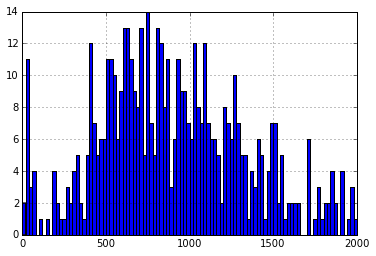

In [62]:
criterion3['LEN'].hist(bins = 100, range = [0, 2000])

In [63]:
criterion3['LEN'].median()

913.5

898.0


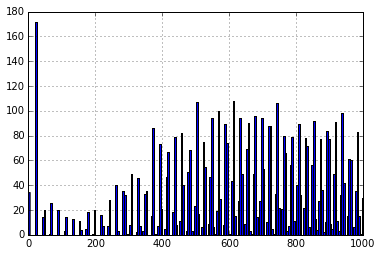

In [64]:
sampled_df['LEN'].hist(bins = 200, range = [0, 1000])
print(sampled_df['LEN'].median())

In [65]:
#Let's try lengths less than the median value
criterion5 = sampled_df[sampled_df['LEN'] < 900]
print(criterion5.shape)

(4518, 17)


In [66]:
cri5_start_latlong = np.array([[p[1], p[0]] for p in criterion5['START_POINT'] if len(p)>0])
cri5_end_latlong = np.array([[p[1], p[0]] for p in criterion5['END_POINT'] if len(p)>0])
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import cross_validation
from time import time

X_5 = cri5_start_latlong
y_5 = cri5_end_latlong

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size=0.3)

#X = StandardScaler().fit_transform(X_train)
k_means_5 = KMeans(init='random', n_clusters=12, n_init=25)
k_means_5.fit(X_5)
k_means_5_labels = k_means_5.predict(y_5)
k_means_5_cluster_centres = k_means_5.cluster_centers_

print(k_means_5_labels)
print(set(k_means_5_labels))

#from sklearn import metrics
#k_means_5_silhouette_score = metrics.silhouette_score(X, k_means_5_labels, metric='euclidean')
#print(k_means_5_silhouette_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
y_train_classes = k_means_5.predict(y_train)
y_test_classes = k_means_5.predict(y_test)

knn = KNeighborsClassifier(n_neighbors=100, metric='euclidean')
knn.fit(X_train, y_train_classes) 
predicted = knn.predict(X_test)

print(predicted[:10], y_train[:10], y_test[:10])
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_classes, predicted)

print(cm)


print(mean_squared_error(y_test_classes, predicted))
print(accuracy_score(y_test_classes, predicted))


[11 11  4 ...,  3  8 10]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
[ 5 11  5 11 11  2 11  9 11  3] [[ 41.144382  -8.605971]
 [ 41.155191  -8.60463 ]
 [ 41.177124  -8.645148]
 [ 41.180301  -8.658135]
 [ 41.154066  -8.596062]
 [ 41.154354  -8.613342]
 [ 41.142726  -8.596395]
 [ 41.183532  -8.687457]
 [ 41.140989  -8.610039]
 [ 41.14818   -8.613   ]] [[ 41.176071  -8.587944]
 [ 41.151006  -8.604837]
 [ 41.142555  -8.61228 ]
 [ 41.142915  -8.614944]
 [ 41.152464  -8.617716]
 [ 41.206734  -8.566083]
 [ 41.146461  -8.604324]
 [ 41.18085   -8.582499]
 [ 41.169447  -8.635167]
 [ 41.182416  -8.611353]]
[[ 22   8   1   2  11   4   0   2   8   1   9  11]
 [  5  22   0   0   7  22   0   3   8   3  30  60]
 [  0   3  22   7   1  13   0   0   0  34   8   8]
 [  3   0   8  14   1   8   0   7   1   5   6   2]
 [  7  15   1   1   9  14   0   1   8   1  18  47]
 [  1   8   4   2   0  54   0   0   1  11  25  70]
 [  3   0   0   0   0   0   0   0   2   0   1   0]
 [  7   9   4   6   2  12   0   5   1   5  16

Here the result was closer to before.  Using a shorter length, and then coupling that with day of the week, actually brought the accuracy up.

In [67]:
criterion6 = sampled_df[(sampled_df['LEN'] < 600) & (sampled_df['daysofweek'] <= 5)]
print(criterion5.shape)

(4518, 17)


In [68]:
cri6_start_latlong = np.array([[p[1], p[0]] for p in criterion6['START_POINT'] if len(p)>0])
cri6_end_latlong = np.array([[p[1], p[0]] for p in criterion6['END_POINT'] if len(p)>0])
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import cross_validation
from time import time

X_6 = cri6_start_latlong
y_6 = cri6_end_latlong

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_6, y_6, test_size=0.3)

#X = StandardScaler().fit_transform(X_train)
k_means_5 = KMeans(init='random', n_clusters=12, n_init=25)
k_means_5.fit(X_6)
k_means_5_labels = k_means_5.predict(y_6)
k_means_5_cluster_centres = k_means_5.cluster_centers_


#from sklearn import metrics
#k_means_5_silhouette_score = metrics.silhouette_score(X, k_means_5_labels, metric='euclidean')
#print(k_means_5_silhouette_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
y_train_classes = k_means_5.predict(y_train)
y_test_classes = k_means_5.predict(y_test)

knn = KNeighborsClassifier(n_neighbors=100, metric='euclidean')
knn.fit(X_train, y_train_classes) 
predicted = knn.predict(X_test)

print(predicted[:10], y_train[:10], y_test[:10])
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_classes, predicted)

print(cm)


print(mean_squared_error(y_test_classes, predicted))
print(accuracy_score(y_test_classes, predicted))


[11  7  0  9  4  3  3  0  4  4] [[ 41.160312  -8.609814]
 [ 41.150547  -8.676234]
 [ 41.157702  -8.624763]
 [ 41.151123  -8.61939 ]
 [ 41.154417  -8.60913 ]
 [ 41.153994  -8.613333]
 [ 41.123367  -8.606025]
 [ 41.16897   -8.628831]
 [ 41.161626  -8.567577]
 [ 41.147757  -8.586576]] [[ 41.145525  -8.607294]
 [ 41.153787  -8.610336]
 [ 41.162256  -8.620956]
 [ 41.158287  -8.670321]
 [ 41.17986   -8.598168]
 [ 41.145489  -8.615187]
 [ 41.164605  -8.647434]
 [ 41.140719  -8.61309 ]
 [ 41.180121  -8.624961]
 [ 41.172876  -8.609508]]
[[17  0  0 11  0  0  0  4  0  1  1 30]
 [ 4  6  0  4  1  0  0  0  0  2  0  3]
 [11  3  2  2  2  0  0  9  0  0  0  2]
 [13  2  0 17  0  0  0  1  0  5  0  4]
 [ 0  0  0  0 17  2  1  4  0  0  1  4]
 [ 0  0  0  0  5 12  2  1  0  0  1  2]
 [ 0  0  0  0  3 10 11  0  0  0  8  9]
 [ 7  0  0  0  5  2  3 14  0  0  3 27]
 [ 0  2  0  1  0  0  0  0  0  1  0  0]
 [ 1  2  0  2  0  0  0  0  0 13  0  1]
 [ 3  0  0  1  0  1  4  5  0  0 11 31]
 [12  0  0  2  1  1  1  7  0  0  3 48

I also tried using some of the busier origin taxi stands, which brought the accuracy up as well.

In [69]:
sampled_df['ORIGIN_STAND'].value_counts()

15    397
57    248
23    188
53    184
9     179
33    171
18    167
12    145
13    133
36    121
14    113
34    112
25    105
7     100
6      96
61     95
10     95
28     88
21     88
56     84
27     81
60     79
40     75
58     73
38     68
52     61
35     58
32     57
42     56
26     54
     ... 
24     51
49     48
51     47
37     44
20     42
63     41
16     38
47     38
11     35
30     34
19     25
59     22
17     21
1      20
3      20
55     19
31     14
50     14
22     12
45     10
46      9
62      9
39      8
4       7
2       7
29      7
44      6
41      6
43      2
8       1
dtype: int64

In [70]:
#criterion7 = sampled_df[(sampled_df['LEN'] < 600) & (sampled_df['ORIGIN_STAND'] == 57)]
#print(criterion7.shape)

criterion7 = sampled_df[sampled_df['ORIGIN_STAND'] == 57]
print(criterion7.shape)


(248, 17)


In [71]:
cri7_start_latlong = np.array([[p[1], p[0]] for p in criterion7['START_POINT'] if len(p)>0])
cri7_end_latlong = np.array([[p[1], p[0]] for p in criterion7['END_POINT'] if len(p)>0])
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import cross_validation
from time import time

X_7 = cri7_start_latlong
y_7 = cri7_end_latlong

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_7, y_7, test_size=0.3)

#X = StandardScaler().fit_transform(X_train)
k_means_5 = KMeans(init='random', n_clusters=6, n_init=25)
k_means_5.fit(X_7)
k_means_5_labels = k_means_5.predict(y_7)
k_means_5_cluster_centres = k_means_5.cluster_centers_


#from sklearn import metrics
#k_means_5_silhouette_score = metrics.silhouette_score(X, k_means_5_labels, metric='euclidean')
#print(k_means_5_silhouette_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
y_train_classes = k_means_5.predict(y_train)
y_test_classes = k_means_5.predict(y_test)

knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train_classes) 
predicted = knn.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_classes, predicted)

print(cm)


print(mean_squared_error(y_test_classes, predicted))
print(accuracy_score(y_test_classes, predicted))


[[ 1  1  7  0  1]
 [ 0  1  8  0  0]
 [ 1  3 21  0  3]
 [ 0  0  6  0  0]
 [ 0  1 16  0  5]]
3.73333333333
0.373333333333


In [73]:
criterion7 = sampled_df[(sampled_df['LEN'] < 600) & (sampled_df['ORIGIN_STAND'] == 57)]
print(criterion7.shape)




(70, 17)


In [74]:
cri7_start_latlong = np.array([[p[1], p[0]] for p in criterion7['START_POINT'] if len(p)>0])
cri7_end_latlong = np.array([[p[1], p[0]] for p in criterion7['END_POINT'] if len(p)>0])
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import cross_validation
from time import time

X_7 = cri7_start_latlong
y_7 = cri7_end_latlong

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_7, y_7, test_size=0.3)

#X = StandardScaler().fit_transform(X_train)
k_means_5 = KMeans(init='random', n_clusters=6, n_init=25)
k_means_5.fit(X_7)
k_means_5_labels = k_means_5.predict(y_7)
k_means_5_cluster_centres = k_means_5.cluster_centers_


#from sklearn import metrics
#k_means_5_silhouette_score = metrics.silhouette_score(X, k_means_5_labels, metric='euclidean')
#print(k_means_5_silhouette_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
y_train_classes = k_means_5.predict(y_train)
y_test_classes = k_means_5.predict(y_test)

knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train_classes) 
predicted = knn.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_classes, predicted)

print(cm)


print(mean_squared_error(y_test_classes, predicted))
print(accuracy_score(y_test_classes, predicted))


[[12  0  0  1]
 [ 1  0  0  0]
 [ 0  0  0  1]
 [ 5  0  0  1]]
7.61904761905
0.619047619048


Selecting for a length of the trip of 600 (2.5 hours) or less and selecting one of the busier origin stands brings  the accuracy up to 60% pretty consistently.  

Taxi ID, though, turned out to be very helpful, in some cases bringing the score around to 90%.  However, it's very inconsistent-- the destinations of some Taxi IDs vary more than others.

In [86]:
criterion7 = sampled_df[(sampled_df['TAXI_ID'] == 20000483 )]
print(criterion7.shape)


(46, 17)


In [84]:
sampled_df['TAXI_ID'].value_counts().head(15)

20000403    66
20000080    50
20000129    48
20000483    46
20000621    45
20000307    44
20000476    42
20000239    42
20000089    42
20000600    42
20000066    41
20000450    40
20000686    40
20000179    39
20000101    39
dtype: int64

In [87]:
cri7_start_latlong = np.array([[p[1], p[0]] for p in criterion7['START_POINT'] if len(p)>0])
cri7_end_latlong = np.array([[p[1], p[0]] for p in criterion7['END_POINT'] if len(p)>0])
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import cross_validation
from time import time

X_7 = cri7_start_latlong
y_7 = cri7_end_latlong

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_7, y_7, test_size=0.3)

#X = StandardScaler().fit_transform(X_train)
k_means_5 = KMeans(init='random', n_clusters=6, n_init=25)
k_means_5.fit(X_7)
k_means_5_labels = k_means_5.predict(y_7)
k_means_5_cluster_centres = k_means_5.cluster_centers_


#from sklearn import metrics
#k_means_5_silhouette_score = metrics.silhouette_score(X, k_means_5_labels, metric='euclidean')
#print(k_means_5_silhouette_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
y_train_classes = k_means_5.predict(y_train)
y_test_classes = k_means_5.predict(y_test)

knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train_classes) 
predicted = knn.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_classes, predicted)

print(cm)


print(mean_squared_error(y_test_classes, predicted))
print(accuracy_score(y_test_classes, predicted))


[[1 0 0 0 0]
 [0 4 0 0 0]
 [0 3 0 0 0]
 [0 2 0 0 0]
 [3 1 0 0 0]]
8.0
0.357142857143


Columns other than GPS seem to influence the prediction, so using another more sophisticated classifier that could combine them might also improve the predictions.
In the hope of making predictions more precise, I started to try neural nets.

I created a new subset of the dataframe, this time keeping only Origin Call, Origin Stand, Taxi ID, Timestamp, length, hours, and day of the week.  


In [88]:
net_df = sampled_df[list(sampled_df.columns[2:6])+list(sampled_df.columns[11:12])+list(sampled_df.columns[13:15])]
net_df=net_df.fillna(0)
print(net_df)

         ORIGIN_CALL  ORIGIN_STAND   TAXI_ID   TIMESTAMP           datetimes  \
844019             0             0  20000364  1388267053 2013-12-28 13:44:13   
1538002            0            32  20000546  1401279907 2014-05-28 05:25:07   
617362         17739             0  20000665  1384035394 2013-11-09 14:16:34   
949042             0            49  20000499  1390387265 2014-01-22 02:41:05   
1230848            0            15  20000393  1395766500 2014-03-25 09:55:00   
1027278            0             0  20000698  1391928147 2014-02-08 22:42:27   
1398148            0             0  20000361  1398946821 2014-05-01 05:20:21   
938809         15043             0  20000625  1390131660 2014-01-19 03:41:00   
577971          2002             0  20000254  1383346956 2013-11-01 16:02:36   
1177776            0             0  20000616  1394728930 2014-03-13 09:42:10   
1471302            0            25  20000440  1400084601 2014-05-14 09:23:21   
773789             0             0  2000

I then tried to put them into a neural network, but I couldn't get that to work.

In [89]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

X = np.array(net_df)
y = np.array([[p[1], p[0]] if len(p)>0 else [0, 0] for p in sampled_df['END_POINT']])

print(len(X))
print(len(y))

print(X[:5], y[:5])
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


y_train_classes = k_means_5.predict(y_train)
y_test_classes = k_means_5.predict(y_test)

print(y_train_classes[:5], y_test_classes[:5])
model = Sequential()
model.add(Dense(7, 340, activation='tanh'))
model.add(Dense(340, 340, activation='tanh'))
model.add(Dense(340, 340, activation='tanh'))
model.add(Dense(340, 1, activation='softmax'))

model.exception_verbosity='high'

sgd = SGD(lr=0.02)
model.compile(loss='mean_squared_error', optimizer=sgd)

model.fit(X_train, y_train_classes, nb_epoch=20)
score = model.evaluate(X_test, y_test_classes)

predskeras = model.predict(X_test, batch_size=16)

print("Make predictions on the test set")
test_probs = (predskeras) 
print (test_probs)

9000
9000
[[0.0 0.0 20000364 1388267053 Timestamp('2013-12-28 13:44:13') 6
  'Saturday 13']
 [0.0 32.0 20000546 1401279907 Timestamp('2014-05-28 05:25:07') 3
  'Wednesday 05']
 [17739.0 0.0 20000665 1384035394 Timestamp('2013-11-09 14:16:34') 6
  'Saturday 14']
 [0.0 49.0 20000499 1390387265 Timestamp('2014-01-22 02:41:05') 3
  'Wednesday 02']
 [0.0 15.0 20000393 1395766500 Timestamp('2014-03-25 09:55:00') 2
  'Tuesday 09']] [[ 41.141025  -8.613333]
 [ 41.146776  -8.6202  ]
 [ 41.156685  -8.681463]
 [ 41.170869  -8.580663]
 [ 41.154849  -8.630649]]
[2 2 5 3 0] [2 1 1 1 1]
Epoch 0


ValueError: ('Bad input argument to theano function with name "/Users/mikeludwig/anaconda/lib/python3.4/site-packages/keras/models.py:328"  at index 0(0-based)', "could not convert string to float: 'Sunday 15'")

In [90]:
loss = model.fit(X_train, y_train_classes, nb_epoch=20)

Epoch 0


ValueError: ('Bad input argument to theano function with name "/Users/mikeludwig/anaconda/lib/python3.4/site-packages/keras/models.py:328"  at index 0(0-based)', "could not convert string to float: 'Tuesday 21'")

In [91]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test_classes, predskeras)

print(cm)


print(mean_squared_error(y_test_classes, predskeras))
print(accuracy_score(y_test_classes, predskeras))

loss.history['loss’]

SyntaxError: EOL while scanning string literal (<ipython-input-91-b7133eec5ed8>, line 15)

I tried the original start and end point columns using the kmeans cluster, but the accuracy was low (7%)-- the neural network classifier seemed to be betting on the biggest cluster.

In [98]:
X = start_latlong
y = end_latlong

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#X = StandardScaler().fit_transform(X_train)
k_means_5 = KMeans(init='random', n_clusters=6, n_init=25)
k_means_5.fit(X)
k_means_5_labels = k_means_5.predict(y)
k_means_5_cluster_centres = k_means_5.cluster_centers_
y_train_classes = k_means_5.predict(y_train)
y_test_classes = k_means_5.predict(y_test)

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(2, 340, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(340, 340, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(340, 1, init='uniform'))
model.add(Activation('softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

model.fit(X_train, y_train_classes, nb_epoch=20, batch_size=16)
score = model.evaluate(X_test, y_test_classes, batch_size=16)

Epoch 0
6276/6276 [==============================] - 1s - loss: 5.8552     
Epoch 1
6276/6276 [==============================] - 1s - loss: 5.8552     
Epoch 2
6276/6276 [==============================] - 1s - loss: 5.8552     
Epoch 3
6276/6276 [==============================] - 1s - loss: 5.8552     
Epoch 4
6276/6276 [==============================] - 1s - loss: 5.8552     
Epoch 5
6276/6276 [==============================] - 1s - loss: 5.8552     
Epoch 6
6276/6276 [==============================] - 1s - loss: 5.8552     
Epoch 7
6276/6276 [==============================] - 1s - loss: 5.8552     
Epoch 8
6276/6276 [==============================] - 1s - loss: 5.8552     
Epoch 9
6276/6276 [==============================] - 1s - loss: 5.8552     
Epoch 10
6276/6276 [==============================] - 1s - loss: 5.8552     
Epoch 11
6276/6276 [==============================] - 1s - loss: 5.8552     
Epoch 12
6276/6276 [==============================] - 2s - loss: 5.8552     
Epoch 13


In [99]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


predskeras = model.predict(X_test, batch_size=16)

print("Make predictions on the test set")
test_probs = (predskeras) 
print (test_probs)

cm = confusion_matrix(y_test_classes, predskeras)

print(cm)


print(mean_squared_error(y_test_classes, predskeras))
print(accuracy_score(y_test_classes, predskeras))


Make predictions on the test set
[[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 1.]
 [ 1.]
 [ 1.]]
[[  0 576   0   0   0   0]
 [  0 329   0   0   0   0]
 [  0   2   0   0   0   0]
 [  0 914   0   0   0   0]
 [  0 359   0   0   0   0]
 [  0 510   0   0   0   0]]
5.80855018587
0.122304832714


In conclusion, clustering coordinates by K means and then using the K Nearest Neighbors classifier can produce surprisingly good results, given the column selection.
Moving on, I'd like to move away from clusters to something more precise, perhaps using the gridding coordinates from earlier.  I'd also like to perfect the neural net to more accurately combine the column values, perhaps averaging that classifier with the K Nearest Neighbors one that was already used.